# Lesson 3: Agentic Search

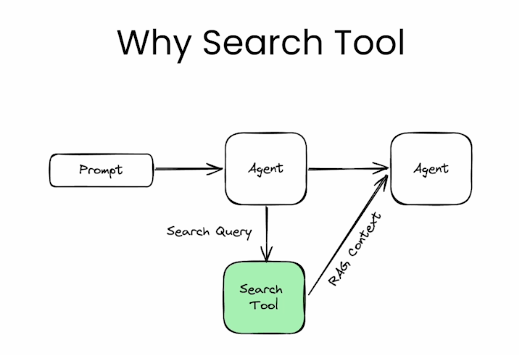

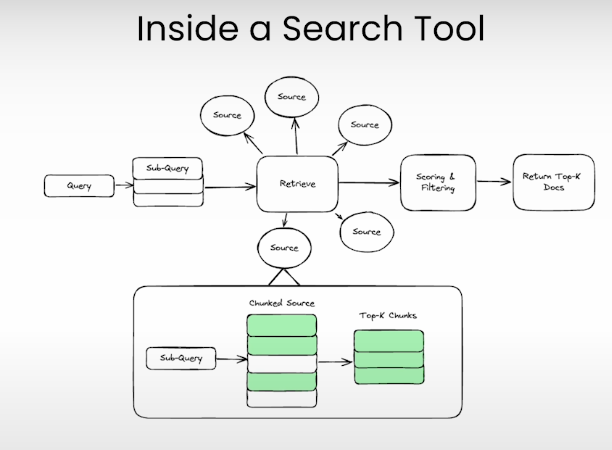

In [1]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

Tavily is a search engine specifically designed for artificial intelligence agents. It delivers real-time, accurate and fast results. It is compatible with many MCP clients such as VS Code, Cline, Cursor, Claude Desktop and can also work with any MCP client

In [2]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]


'The Blackwell GPU features advanced architecture for AI, including Tensor Cores, NVLink 4, and Confidential Computing for security. It powers high-performance datacenter solutions and generative AI.'

## Regular search

In [3]:
# choose location (try to change to your own city!)

city = "San Francisco"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

> Note: search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.

In [4]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  


for i in search(query):
    print(i)

https://weather.com/weather/today/l/San+Francisco+CA+USCA0987:1:US
https://weather.com/weather/hourbyhour/l/USCA0987:1:US
https://weather.com/en-NA/weather/today/l/San+Francisco+CA+United+States?canonicalCityId=e7784799733d2133bcb75674a102b347


In [5]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.

In [6]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

Website: https://weather.com/en-NA/weather/today/l/San+Francisco+CA+United+States?canonicalCityId=e7784799733d2133bcb75674a102b347


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--ZkDop gradients--cloudyFoggyDay--lBhxD gradients--cloudyFoggyDay-top---jGZr" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div><div class="removeIfEmpty" id="WxuNewsroom-meta-bc9f40d5-d941-4fd8-bae2-2d8d63a38bb3"></div></div><div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--sDajQ"><div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0"><div class="adWrapper BaseAd--adWrapper--ANZ1O BaseAd--card--cqv7t BaseAd--hide--hCG8L"><div class="adLabel BaseAd--adLabel--JGSp6">Advertisement</div><div class="ad_module BaseAd--ad_module--ajh9S subs-undefined BaseAd--placeholder--ofteC" id="WX_Hidden"></div></div></div><div class="removeIfEmpty" id="WxuAd-topAds-

In [7]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/en-NA/weather/today/l/San+Francisco+CA+United+States?canonicalCityId=e7784799733d2133bcb75674a102b347


recents Account Privacy Special Forecasts San Francisco, CA, United States Weather Today in San Francisco, CA, United States 06:06 20:06 Morning Afternoon Evening Overnight Hourly Forecast Now 07:00 08:00 09:00 10:00 Daily Forecast Today Fri 09 Sat 10 Sun 11 Mon 12 Radar Air Quality Index Air quality is considered satisfactory, and air pollution poses little or no risk. Health & Activities Seasonal Allergies and Pollen Count Forecast Grass pollen is high in your area We recognise our responsibility to use data and technology for good. We may use or share your data with our data vendors. Take control of your data. The Weather Channel is the world's most accurate forecaster according to ForecastWatch, Global and Regional Weather Forecast Accuracy Overview , 2017-2022, commissioned by The Weather Company. Weather Channel © The Weather Company, LLC 2025


## Agentic Search

In [8]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1746711561, 'localtime': '2025-05-08 06:39'}, 'current': {'last_updated_epoch': 1746711000, 'last_updated': '2025-05-08 06:30', 'temp_c': 10.6, 'temp_f': 51.1, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 2.9, 'wind_kph': 4.7, 'wind_degree': 189, 'wind_dir': 'S', 'pressure_mb': 1019.0, 'pressure_in': 30.1, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 89, 'cloud': 75, 'feelslike_c': 10.5, 'feelslike_f': 51.0, 'windchill_c': 9.0, 'windchill_f': 48.2, 'heatindex_c': 9.7, 'heatindex_f': 49.4, 'dewpoint_c': 9.4, 'dewpoint_f': 48.9, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 4.8, 'gust_kph': 7.8}}


In [10]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)


{
    "location": {
        "name": "San Francisco",
        "region": "California",
        "country": "United States of America",
        "lat": 37.775,
        "lon": -122.4183,
        "tz_id": "America/Los_Angeles",
        "localtime_epoch": 1746711561,
        "localtime": "2025-05-08 06:39"
    },
    "current": {
        "last_updated_epoch": 1746711000,
        "last_updated": "2025-05-08 06:30",
        "temp_c": 10.6,
        "temp_f": 51.1,
        "is_day": 1,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 2.9,
        "wind_kph": 4.7,
        "wind_degree": 189,
        "wind_dir": "S",
        "pressure_mb": 1019.0,
        "pressure_in": 30.1,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 89,
        "cloud": 75,
        "feelslike_c": 10.5,
        "feelslike_f": 51.0,
        "windchill_c": 9.0,
        "

<img src="./google_sample.png" width="800" height="600">